In [2]:
import socket
from time import time
import argparse
import torch
import torch.optim as optim
import networkx as nx
from tqdm import tqdm
from hyperbolicity.delta import compute_hyperbolicity_batch, compute_hyperbolicity, compute_delta_from_distances_batched
from hyperbolicity.utils import floyd_warshall, soft_max, construct_weighted_matrix, make_batches
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tikzplotlib

ModuleNotFoundError: No module named 'tikzplotlib'

In [3]:
pip install tikzplotlib

  Using cached tikzplotlib-0.10.1-py3-none-any.whl.metadata (8.9 kB)
  Using cached webcolors-24.11.1-py3-none-any.whl.metadata (2.2 kB)
Using cached tikzplotlib-0.10.1-py3-none-any.whl (54 kB)
Using cached webcolors-24.11.1-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
base_path = '../datasets'

c_elegan = 'D_csphd.pkl'
c_elegan_path = os.path.join(base_path, c_elegan)
with open(c_elegan_path, 'rb') as f:
    distances = pickle.load(f)
distances = torch.tensor(distances).to('cuda').type(torch.float32)
true_delta = 6.5

In [6]:
delta_scale = 1000
n_batches = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
batch_size = [4, 8, 16, 32]
n_exp = 5
results = {i: [] for i in batch_size}

for i in batch_size:
    for j in n_batches:
        exp = []
        for k in range(n_exp):
            M_batch = make_batches(distances, i, j)
            delta_soft = soft_max(compute_delta_from_distances_batched(M_batch, 100), 100)
            exp.append(delta_soft.item())
        results[i].append(np.mean(exp))
        print(f'n_batches {j} done !')
    print(f'batch_size {i} done !')


n_batches 1 done !
n_batches 2 done !
n_batches 3 done !
n_batches 4 done !
n_batches 5 done !
n_batches 10 done !
n_batches 20 done !
n_batches 30 done !
n_batches 40 done !
n_batches 50 done !
n_batches 60 done !
n_batches 70 done !
n_batches 80 done !
batch_size 4 done !
n_batches 1 done !
n_batches 2 done !
n_batches 3 done !
n_batches 4 done !
n_batches 5 done !
n_batches 10 done !
n_batches 20 done !
n_batches 30 done !
n_batches 40 done !
n_batches 50 done !
n_batches 60 done !
n_batches 70 done !
n_batches 80 done !
batch_size 8 done !
n_batches 1 done !
n_batches 2 done !
n_batches 3 done !
n_batches 4 done !
n_batches 5 done !
n_batches 10 done !
n_batches 20 done !
n_batches 30 done !
n_batches 40 done !
n_batches 50 done !
n_batches 60 done !
n_batches 70 done !
n_batches 80 done !
batch_size 16 done !


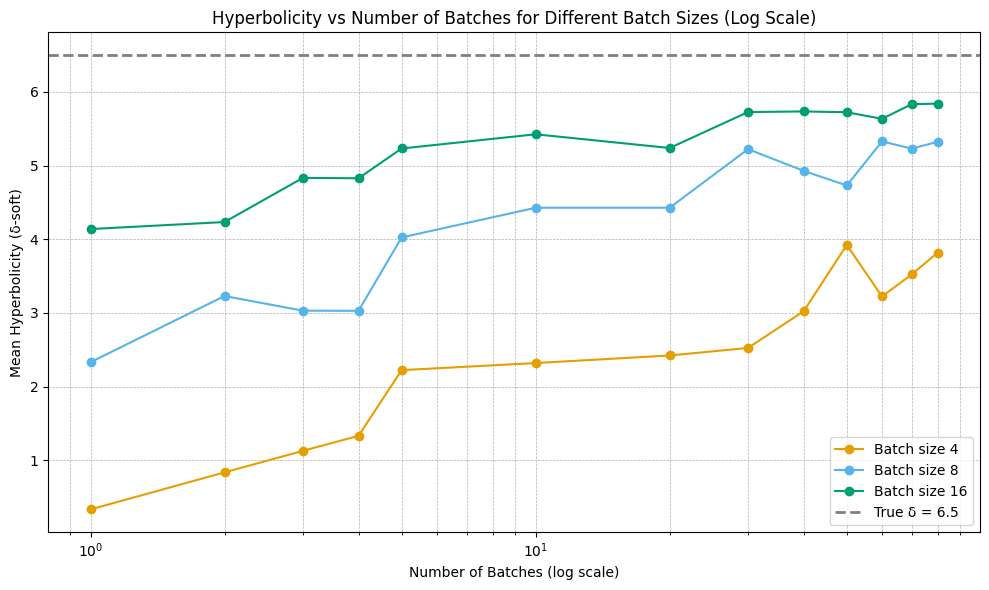

NameError: name 'tikzplotlib' is not defined

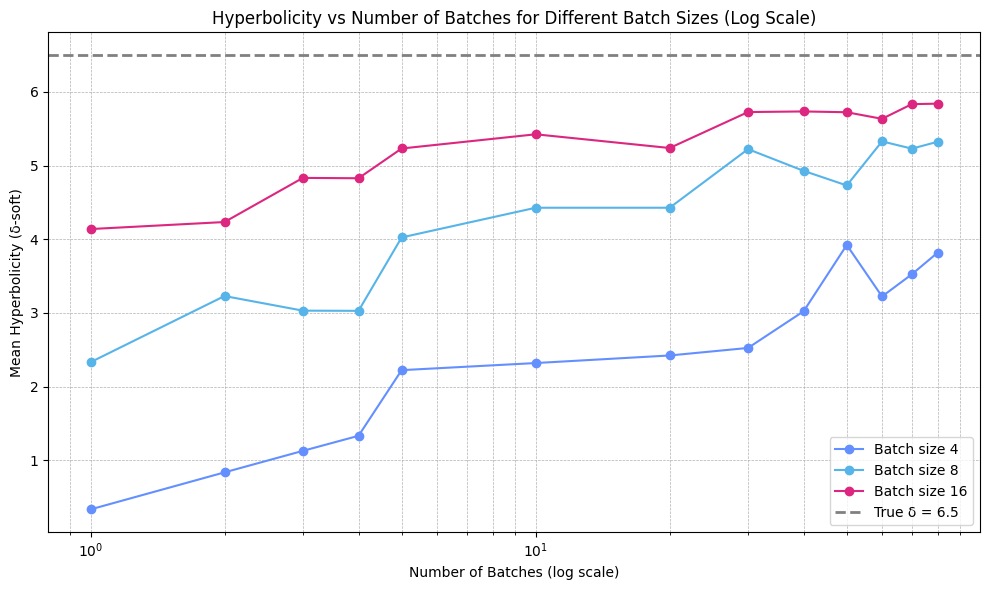

In [7]:
colors = ['#E69F00', '#56B4E9', '#009E73', '#D55E00']
plt.figure(figsize=(10, 6))
for idx, i in enumerate(batch_size):
    plt.plot(n_batches, results[i], label=f'Batch size {i}', marker='o', color=colors[idx])

# Add horizontal line for true delta
plt.axhline(y=true_delta, color='gray', linestyle='--', linewidth=2, label='True δ = 6.5')

# Set log scale for x-axis
plt.xscale('log')

# Labels and legend
plt.xlabel("Number of Batches (log scale)")
plt.ylabel("Mean Hyperbolicity (δ-soft)")
plt.title("Hyperbolicity vs Number of Batches for Different Batch Sizes (Log Scale)")
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

colors = ['#648FFF', '#56B4E9', '#DC267F', '#FE6100', '#FFB000']
plt.figure(figsize=(10, 6))
for idx, i in enumerate(batch_size):
    plt.plot(n_batches, results[i], label=f'Batch size {i}', marker='o', color=colors[idx])

# Add horizontal line for true delta
plt.axhline(y=true_delta, color='gray', linestyle='--', linewidth=2, label='True δ = 6.5')

# Set log scale for x-axis
plt.xscale('log')

# Labels and legend
plt.xlabel("Number of Batches (log scale)")
plt.ylabel("Mean Hyperbolicity (δ-soft)")
plt.title("Hyperbolicity vs Number of Batches for Different Batch Sizes (Log Scale)")
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
tikzplotlib.save("/share/home/houedry/projects/DifferentiableHyperbolicity/hyperbolicity/expes/hyperbolicity_plot.tex")
plt.show()